In [90]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


import seaborn as sns
sns.set(style = 'ticks')

In [91]:
#Reading the data from car.data
df = pd.read_csv('C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/qld-freshwater-fish-stocking-2009-2018.csv',header=0)
print(df.dtypes)
df.head()

Date Stocked        object
Location stocked    object
Catchment           object
Species stocked     object
Number stocked       int64
dtype: object


,Date Stocked,Location stocked,Catchment,Species stocked,Number stocked
0,3/01/2009,Goondiwindi (Hilton) Weir,Border Rivers,Murray Cod,5000
1,3/01/2009,Macintyre River,Border Rivers,Murray Cod,1298
2,10/01/2009,Pukallus Weir,Brisbane,Golden Perch,34000
3,10/01/2009,Surat Weir,Condamine and Balonne,Murray Cod,7500
4,10/01/2009,Surat Weir,Condamine and Balonne,Golden Perch,20000


In [92]:
df.count()

Date Stocked        1192
Location stocked    1192
Catchment           1192
Species stocked     1192
Number stocked      1192
dtype: int64

In [93]:
df.isnull().sum()

Date Stocked        0
Location stocked    0
Catchment           0
Species stocked     0
Number stocked      0
dtype: int64

In [94]:
df['Species stocked'].value_counts()

Golden Perch       371
Barramundi         358
Australian Bass    185
Murray Cod         123
Silver Perch       118
Saratoga            14
Mary River Cod      12
Mangrove Jack        5
Sooty Grunter        2
Sea Mullet           2
Sleepy Cod           2
Name: Species stocked, dtype: int64

In [95]:
def ohe(df,var,top):
    for l in top:
        df[var+'_'+l]=np.where(df[var]==l,1,0)

In [96]:
#df=df.groupby('Species stocked').filter(lambda x : len(x)>100)

In [97]:
top=[x for x in df['Species stocked'].value_counts().sort_values(ascending=False).head(10).index]

In [98]:
top

['Golden Perch',
 'Barramundi',
 'Australian Bass',
 'Murray Cod',
 'Silver Perch',
 'Saratoga',
 'Mary River Cod',
 'Mangrove Jack',
 'Sleepy Cod',
 'Sea Mullet']

In [99]:
ohe(df,'Species stocked',top)

In [100]:
df['Location stocked'].value_counts()

Lake Awoonga          88
Tinaroo Dam           48
Leslie Dam            46
Glenlyon Dam          42
Connolly Dam          25
                      ..
BAROON POCKET DAM      1
Tara Weir              1
Herbert River          1
Barron River           1
Saddlers Waterhole     1
Name: Location stocked, Length: 137, dtype: int64

In [43]:
top=[x for x in df['Location stocked'].value_counts().sort_values(ascending=False).head(10).index]

In [44]:
ohe(df,'Location stocked',top)

In [45]:
#df=df.groupby('Location stocked').filter(lambda x : len(x)>25)

In [101]:
df['Catchment'].value_counts()

Condamine and Balonne    211
Border Rivers            162
Brisbane                 136
Burnett                  111
Gladstone                 90
Fitzroy                   87
Mary                      64
Burdekin                  62
Barron                    53
Pine                      38
Pioneer                   33
Logan                     30
Gulf                      24
Whitsundays               20
Kolan                     16
Townsville                11
Warrego                   11
Caboolture                 9
Gold Coast                 7
Tully                      7
Mary River                 5
Ross                       2
Mulgrave-Russell           2
Herbet                     1
Name: Catchment, dtype: int64

In [102]:
top=[x for x in df['Catchment'].value_counts().sort_values(ascending=False).head(10).index]
ohe(df,'Catchment',top)

In [103]:
#df=df.groupby('Catchment').filter(lambda x : len(x)>10)

In [104]:
df['Date Stocked'].value_counts()

20/02/2011    15
1/01/2012     12
11/02/2018    12
5/02/2012     11
2/02/2014     11
              ..
28/10/2017     1
26/03/2009     1
24/05/2018     1
3/02/2011      1
16/04/2018     1
Name: Date Stocked, Length: 601, dtype: int64

In [105]:
df['Date Stocked'] = pd.to_datetime(df['Date Stocked'])

In [106]:
#df['Stocked Date']= df['Date Stocked'].dt.date
df['Stocked Day']=df['Date Stocked'].apply(lambda x:x.day)
#train['pickup_hour']=train['Date Stocked'].apply(lambda x:x.hour)
#df['Stocked Week']=df['Date Stocked'].apply(lambda x:calendar.day_name[x.weekday()])
df['Stocked Month']=df['Date Stocked'].apply(lambda x:x.month)
df['Stocked Year']=df['Date Stocked'].apply(lambda x:x.year)

In [107]:
df

,Date Stocked,Location stocked,Catchment,Species stocked,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,...,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Day,Stocked Month,Stocked Year
0,2009-03-01,Goondiwindi (Hilton) Weir,Border Rivers,Murray Cod,5000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3,2009
1,2009-03-01,Macintyre River,Border Rivers,Murray Cod,1298,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3,2009
2,2009-10-01,Pukallus Weir,Brisbane,Golden Perch,34000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,10,2009
3,2009-10-01,Surat Weir,Condamine and Balonne,Murray Cod,7500,0,0,0,1,0,...,0,0,0,0,0,0,0,1,10,2009
4,2009-10-01,Surat Weir,Condamine and Balonne,Golden Perch,20000,1,0,0,0,0,...,0,0,0,0,0,0,0,1,10,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,2018-05-23,Lake Awoonga,Gladstone,Barramundi,11111,0,1,0,0,0,...,0,1,0,0,0,0,0,23,5,2018
1188,2018-05-24,Lake Awoonga,Gladstone,Barramundi,11140,0,1,0,0,0,...,0,1,0,0,0,0,0,24,5,2018
1189,2018-05-28,Lake Awoonga,Gladstone,Barramundi,9560,0,1,0,0,0,...,0,1,0,0,0,0,0,28,5,2018
1190,2018-05-06,Lake Awoonga,Gladstone,Barramundi,9600,0,1,0,0,0,...,0,1,0,0,0,0,0,6,5,2018


In [108]:
df.dtypes

Date Stocked                       datetime64[ns]
Location stocked                           object
Catchment                                  object
Species stocked                            object
Number stocked                              int64
Species stocked_Golden Perch                int32
Species stocked_Barramundi                  int32
Species stocked_Australian Bass             int32
Species stocked_Murray Cod                  int32
Species stocked_Silver Perch                int32
Species stocked_Saratoga                    int32
Species stocked_Mary River Cod              int32
Species stocked_Mangrove Jack               int32
Species stocked_Sleepy Cod                  int32
Species stocked_Sea Mullet                  int32
Catchment_Condamine and Balonne             int32
Catchment_Border Rivers                     int32
Catchment_Brisbane                          int32
Catchment_Burnett                           int32
Catchment_Gladstone                         int32


In [109]:
df=df.drop(columns=['Date Stocked', 'Location stocked','Catchment','Species stocked','Stocked Day', 'Stocked Month'])

In [110]:
df

,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,Species stocked_Saratoga,Species stocked_Mary River Cod,Species stocked_Mangrove Jack,Species stocked_Sleepy Cod,...,Catchment_Border Rivers,Catchment_Brisbane,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Year
0,5000,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2009
1,1298,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2009
2,34000,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2009
3,7500,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009
4,20000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,11111,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018
1188,11140,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018
1189,9560,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018
1190,9600,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2018


In [57]:
categorical_feature_mask = df.dtypes=='int64'
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols

['Number stocked', 'Stocked Year']

In [111]:
#categorical_feature_mask = df.dtypes=='int64
# filter categorical columns using mask and turn it into a list
categorical_cols = ['Stocked Year']
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,Stocked Year
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Text(0.5, 1.0, 'Distribution of Location Stocked')

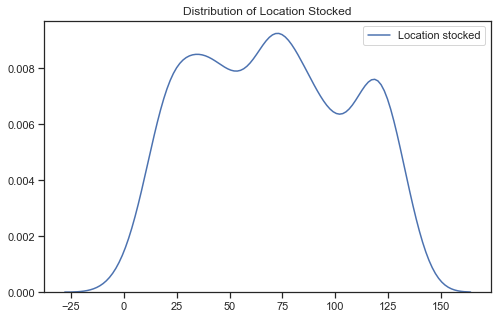

In [194]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Location stocked']).set_title("Distribution of Location Stocked")

Text(0.5, 1.0, 'Distribution of Location stocked (log scale)')

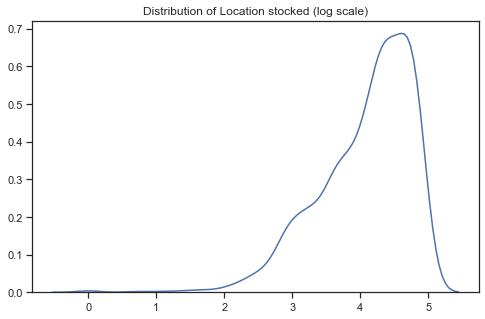

In [195]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Location stocked'].values)).set_title("Distribution of Location stocked (log scale)")

Text(0.5, 1.0, 'Location stocked vs Number stocked')

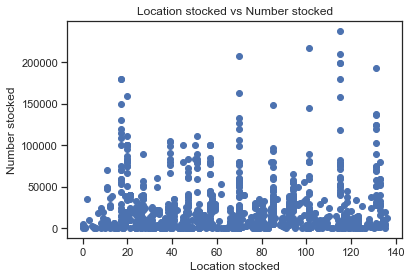

In [196]:
plt.scatter(x=df['Location stocked'],y=df['Number stocked'])
plt.xlabel("Location stocked")
plt.ylabel("Number stocked")
plt.title("Location stocked vs Number stocked")

In [59]:
df

,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,Species stocked_Saratoga,Species stocked_Mary River Cod,Species stocked_Mangrove Jack,Species stocked_Sleepy Cod,...,Catchment_Border Rivers,Catchment_Brisbane,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Year
0,5000,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1298,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,34000,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7500,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,11111,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
1188,11140,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
1189,9560,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
1190,9600,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9


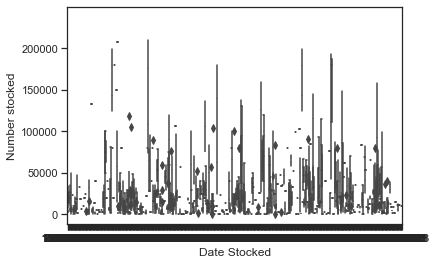

In [122]:
sns.boxplot(data = df, x='Date Stocked', y='Number stocked')

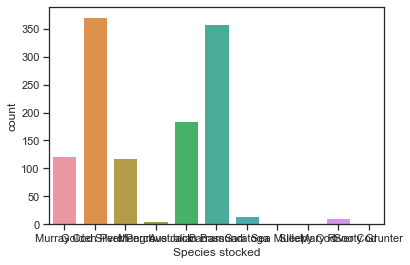

In [148]:
sns.countplot(data = df, x='Species stocked')

Text(0.5, 1.0, 'Distribution of Species stocked (log scale)')

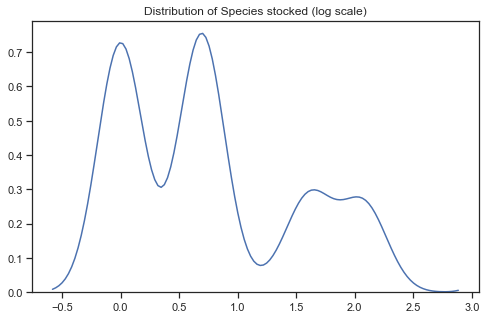

In [151]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Species stocked'].values)).set_title("Distribution of Species stocked (log scale)")

Text(0.5, 1.0, 'Distribution of Location stocked (log scale)')

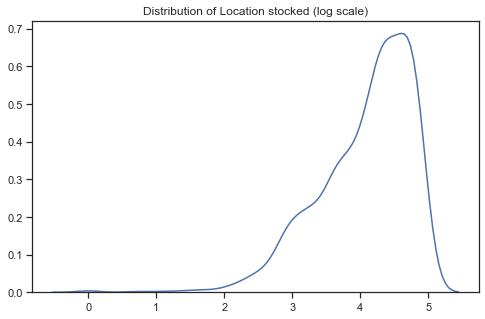

In [152]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Location stocked'].values)).set_title("Distribution of Location stocked (log scale)")

Text(0.5, 1.0, 'Distribution of Catchment (log scale)')

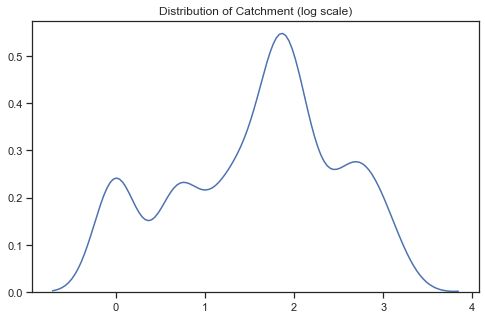

In [153]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Catchment'].values)).set_title("Distribution of Catchment (log scale)")

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df['Location stocked'].values),label='Location')
#sns.kdeplot(np.log(JFK_dropoff['fare_amount'].values),label='JFK Dropoff')
sns.kdeplot(np.log(df['fare_amount'].values),label='All Trips in Train data')
plt.title("Fare Amount Distribution")

In [60]:
df.describe()

,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,Species stocked_Saratoga,Species stocked_Mary River Cod,Species stocked_Mangrove Jack,Species stocked_Sleepy Cod,...,Catchment_Border Rivers,Catchment_Brisbane,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Year
count,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,...,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,22204.446309,0.311242,0.300336,0.155201,0.103188,0.098993,0.011745,0.010067,0.004195,0.001678,...,0.135906,0.114094,0.093121,0.075503,0.072987,0.053691,0.052013,0.044463,0.031879,4.661913
std,31794.707155,0.463196,0.458596,0.362248,0.304332,0.298778,0.107781,0.099871,0.064657,0.040944,...,0.342833,0.318059,0.290724,0.264313,0.260224,0.225502,0.222147,0.206208,0.175752,2.605418
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,27812.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
max,237995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [112]:
df.head(10)

,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,Species stocked_Saratoga,Species stocked_Mary River Cod,Species stocked_Mangrove Jack,Species stocked_Sleepy Cod,...,Catchment_Border Rivers,Catchment_Brisbane,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Year
0,5000,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1298,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,34000,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,7500,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,35000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,20000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,35000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,10695,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10000,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [113]:
df.corr()

,Number stocked,Species stocked_Golden Perch,Species stocked_Barramundi,Species stocked_Australian Bass,Species stocked_Murray Cod,Species stocked_Silver Perch,Species stocked_Saratoga,Species stocked_Mary River Cod,Species stocked_Mangrove Jack,Species stocked_Sleepy Cod,...,Catchment_Border Rivers,Catchment_Brisbane,Catchment_Burnett,Catchment_Gladstone,Catchment_Fitzroy,Catchment_Mary,Catchment_Burdekin,Catchment_Barron,Catchment_Pine,Stocked Year
Number stocked,1.000000,0.192069,-0.188803,0.264900,-0.196848,-0.087038,-0.076006,-0.061278,-0.017590,-0.027825,...,-0.039312,0.201548,0.244082,0.054512,-0.031774,-0.019676,-0.107845,-0.129076,0.058490,-0.002574
Species stocked_Golden Perch,0.192069,1.000000,-0.440427,-0.288129,-0.228023,-0.222820,-0.073284,-0.067790,-0.043629,-0.027559,...,0.198694,0.060817,0.009054,-0.192108,0.096979,-0.015430,-0.157461,-0.145008,-0.018845,-0.083885
Species stocked_Barramundi,-0.188803,-0.440427,1.000000,-0.280821,-0.222240,-0.217169,-0.071425,-0.066071,-0.042522,-0.026860,...,-0.259835,-0.235123,-0.191053,0.387698,0.090556,-0.091108,0.341035,0.329244,-0.118891,0.097000
Species stocked_Australian Bass,0.264900,-0.288129,-0.280821,1.000000,-0.145390,-0.142072,-0.046726,-0.043224,-0.027818,-0.017572,...,-0.169985,0.232415,0.269257,-0.122490,-0.120268,0.195982,-0.100399,-0.092459,0.172795,0.021837
Species stocked_Murray Cod,-0.196848,-0.228023,-0.222240,-0.145390,1.000000,-0.112435,-0.036979,-0.034207,-0.022015,-0.013906,...,0.259801,-0.121731,-0.108696,-0.096938,-0.095179,-0.080798,-0.079455,-0.073171,-0.061553,-0.109509
Species stocked_Silver Perch,-0.087038,-0.222820,-0.217169,-0.142072,-0.112435,1.000000,-0.036135,-0.033426,-0.021513,-0.013589,...,0.073471,0.110770,0.058111,-0.094726,-0.060610,-0.004182,-0.077642,-0.071501,-0.044159,0.033323
Species stocked_Saratoga,-0.076006,-0.073284,-0.071425,-0.046726,-0.036979,-0.036135,1.000000,-0.010994,-0.007075,-0.004469,...,-0.043234,-0.014630,0.072250,-0.031155,0.029283,0.008578,-0.025536,-0.023516,0.246165,-0.054617
Species stocked_Mary River Cod,-0.061278,-0.067790,-0.066071,-0.043224,-0.034207,-0.033426,-0.010994,1.000000,-0.006545,-0.004134,...,-0.039993,0.043109,-0.032315,-0.028819,-0.028296,0.050543,-0.023621,-0.021753,0.077371,0.109896
Species stocked_Mangrove Jack,-0.017590,-0.043629,-0.042522,-0.027818,-0.022015,-0.021513,-0.007075,-0.006545,1.000000,-0.002661,...,-0.025739,-0.023291,-0.020797,0.227106,-0.018211,-0.015459,-0.015203,-0.014000,-0.011777,0.038331
Species stocked_Sleepy Cod,-0.027825,-0.027559,-0.026860,-0.017572,-0.013906,-0.013589,-0.004469,-0.004134,-0.002661,1.000000,...,-0.016258,-0.014712,-0.013137,-0.011716,0.146104,-0.009765,-0.009603,-0.008843,-0.007439,0.013193


In [114]:
df.columns

Index(['Number stocked', 'Species stocked_Golden Perch',
       'Species stocked_Barramundi', 'Species stocked_Australian Bass',
       'Species stocked_Murray Cod', 'Species stocked_Silver Perch',
       'Species stocked_Saratoga', 'Species stocked_Mary River Cod',
       'Species stocked_Mangrove Jack', 'Species stocked_Sleepy Cod',
       'Species stocked_Sea Mullet', 'Catchment_Condamine and Balonne',
       'Catchment_Border Rivers', 'Catchment_Brisbane', 'Catchment_Burnett',
       'Catchment_Gladstone', 'Catchment_Fitzroy', 'Catchment_Mary',
       'Catchment_Burdekin', 'Catchment_Barron', 'Catchment_Pine',
       'Stocked Year'],
      dtype='object')

In [115]:
Target_column='Number stocked'
Predictor_columns=[]
for c in df.columns:
    if c!=Target_column and c!='Location stocked':
        Predictor_columns.append(c)

In [116]:
Predictor_columns

['Species stocked_Golden Perch',
 'Species stocked_Barramundi',
 'Species stocked_Australian Bass',
 'Species stocked_Murray Cod',
 'Species stocked_Silver Perch',
 'Species stocked_Saratoga',
 'Species stocked_Mary River Cod',
 'Species stocked_Mangrove Jack',
 'Species stocked_Sleepy Cod',
 'Species stocked_Sea Mullet',
 'Catchment_Condamine and Balonne',
 'Catchment_Border Rivers',
 'Catchment_Brisbane',
 'Catchment_Burnett',
 'Catchment_Gladstone',
 'Catchment_Fitzroy',
 'Catchment_Mary',
 'Catchment_Burdekin',
 'Catchment_Barron',
 'Catchment_Pine',
 'Stocked Year']

In [117]:
#Predictor_columns=['Location stocked','Catchment','Species stocked','Stocked Month','Stocked Year']
#Predictor_columns=['Species stocked']
X=df[Predictor_columns]
y=df[Target_column]
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [118]:
clf = DecisionTreeRegressor(random_state=0)

In [119]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [120]:
print('Training Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_eval,y_eval))

Training Score:  0.5812615207218783
Test Score:  -0.13043359765857288


In [121]:
model = RandomForestRegressor()

In [122]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [123]:
print('Training Score: ',model.score(X_train,y_train))
print('Test Score: ',model.score(X_eval,y_eval))

Training Score:  0.5542673376847769
Test Score:  -0.057721212689743506
